### 경사 하강법 구현 예시

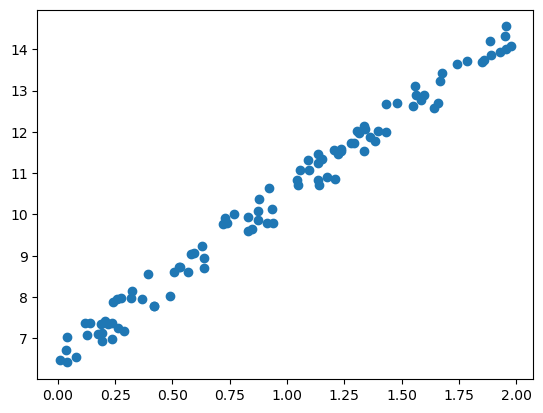

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y=4X+6 을 근사 (w1=4, w0=6) & 임의 값 생성
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

# X, y 데이터 시각화
plt.scatter(X, y)

In [2]:
# 비용함수 정의 (오류값 리턴하는 함수)
def get_cost(y, y_pred):
    N= len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [3]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N, 1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [5]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f}, w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1:4.028, w0:6.490
Gradient Descent Total Cost: 0.0775


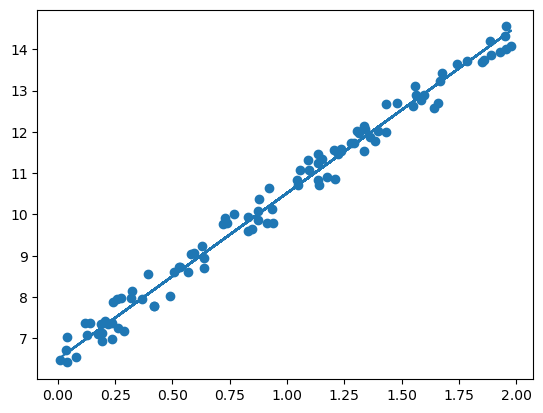

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost: 0.0777


### LinearRegression 이용해 보스턴 주택 가격 회귀 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터셋 로딩 (but 삭제되어서 로딩 불가)
boston = load_boston()

# boston 데이터셋 Dataframe 반환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# 타겟 배열='주택 가격' => 'PRICE' 칼럼으로 DF에 추기
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
# 2개의 행과 4개의 열을 가진 subplots 이용
# 특정 8개의 칼럼이 증가할수록 PRICE 값이 어떻게 변하는지 확인
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # Seaborn regplot 이용 => 산점도, 선형 회귀 직선 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [ ]:
# 회귀 모델 생성
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습, 예측, 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

prins('MSE: {0:.3f}, RMSE: {1:.3f}'. format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구하고 이를 기반으로 RMSE
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

## 다항회귀

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures 이용
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [4]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [6]:
from sklearn.linear_model import LinearRegression

# 일차단항식 계수를 삼차 다항식 계수로 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# linear regression 적용
model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


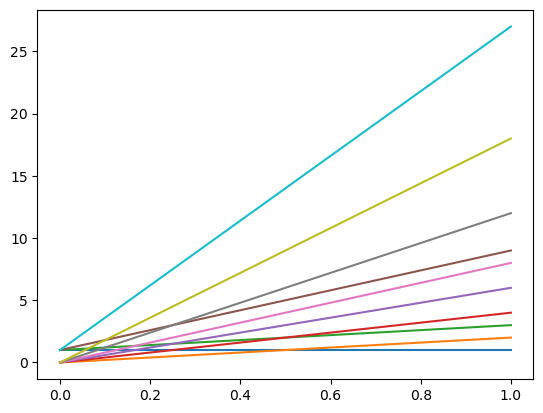

In [8]:
import matplotlib.pyplot as plt
plt.plot(poly_ftr)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체 - polynomial feature 변환과 linear regression 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과적합 이해

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값 리턴하는 함수
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0~1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 true_fun()에서 약간의 노이즈 변동을 더한 값
y = true_fun(X) + np.random.rand(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.52]입니다.
Degree 1 MSE는 0.3855980524675215입니다.

Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24]입니다.
Degree 4 MSE는 0.005719308263122512입니다.

Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59877000e+03  5.21456400e+04 -4.14487380e+05
  1.80876311e+06 -3.38029480e+06 -6.02554528e+06  5.58407528e+07
 -1.69821186e+08  3.08621704e+08 -3.68958383e+08  2.93841862e+08
 -1.50693784e+08  4.51469375e+07 -6.01500512e+06]입니다.
Degree 15 MSE는 42855574.41460031입니다.


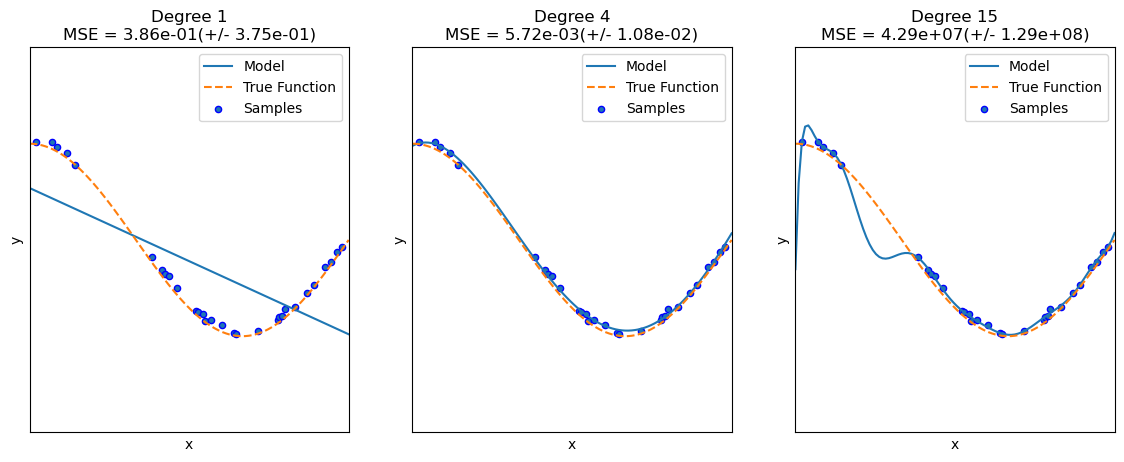

In [4]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측 수행 -> 예측 곡선과 실제 곡선 그려서 비교
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True Function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

### 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해서 릿지 회귀
ridge = Ridge(alpha=10)
neg_mse_scores = corss_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np*sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [ ]:
alphas = [0, 0.1, 1, 10, 100]

# 릿지의 alpha값을 변화시키면서 RMSE값 변화 확인
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score 이용해 5 폴드의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha가 {0}일 때, 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

In [ ]:
# alpha 값 변화에 따른 피처의 회귀 계수값 변화 시각화

# 5개의 열로 그래프 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수값 저장 위한 DF
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환, DF에 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff
    
    coeff =coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlime(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

### 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# 뒤에서도 쓰일 함수이므로 아예 만들어놓기
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력 & 회귀 계수값들을 DF로 변환
def get_linear_reg_eval(model_name, params=None, X_data_=None, y_target_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_sqaured_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:' + str(param)
            coeff_df[colname] = coeff
            
    return coeff_df

In [ ]:
# 라쏘 alpha 파라미터 값 정의
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lass_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

# alpha값에 따른 피처별 회귀 계수
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

### 엘라스틱 회귀

In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_Data, y_target_n=y_target)

# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

### 선형 회귀 모델 데이터 변환

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method: 표준 정규 분포 변환 or 최대/최소 정규화 or 로그변환 결정
# p_degree: 다항식 특성 추가할 때 적용, 2 이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(input_data)
        
    return scaled_data

In [ ]:
# Ridge의 alpha값 다르게 적용
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                   input_data=X_data)
    print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                       y_target_n=y_target, verbose=Fa;se, return_coeff=False)

### 로지스틱 회귀

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler로 평균이 0, 분산 1인 데이터 분포로 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀 이용해서 학습/예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도 & roc_auc 측정
print('Accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                   roc_auc_score(y_test, lr_preds)))

Accuracy: 0.977, roc_auc: 0.972


In [5]:
# 디폴트 solver인 lbfgs 말고 다른 solver 선택해보기
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# solver별로 로지스틱 회귀 수행
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    print('solver: {0}, Accuracy: {1:.3f}, roc_auc: {2:.3f}'.format(solver, accuracy_score(y_test, lr_preds),
                                                                    roc_auc_score(y_test, lr_preds)))

solver: lbfgs, Accuracy: 0.977, roc_auc: 0.972
solver: liblinear, Accuracy: 0.982, roc_auc: 0.979
solver: newton-cg, Accuracy: 0.977, roc_auc: 0.972
solver: sag, Accuracy: 0.982, roc_auc: 0.979
solver: saga, Accuracy: 0.982, roc_auc: 0.979


In [9]:
from sklearn.model_selection import GridSearchCV

params = {'solver': ['liblinear', 'lbfgs'],
         'penalty': ['l2', 'l1'],
         'C': [0.01, 0,1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.975


C:\Users\splen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
27 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\splen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\splen\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\splen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)